Họ và tên: Trần Minh Quân

MSSV: 20521796

Lớp: NT539.O11.MMCL

> Dựa trên dataset và pipeline đã làm ở bài tập số 1, bổ sung thêm các hàm và tính năng sau:
- Kiểm tra sự mất cân bằng trong cột mục tiêu thông qua việc vẽ bart chart.
- Thêm vào pipeline việc xử lý mất cân bằng dữ liệu sử dụng các hàm đã học bao gồm SMOTE, SMOTEENN
- So sánh hiệu xuất mô hình (accuracy, recall, f1) giữa không có xử lý imbalance, xử lý imbalance bằng SMOTE, xử lý imbalance bằng SMOTEENN. In ra thành dạng bảng kết quả so sánh này

# *Inport Libraries*

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt


from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# *Kiểm tra sự mất cân bằng trong cột mục tiêu thông qua việc vẽ bart chart*

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/PROJECTS/28 09/data_final.csv')

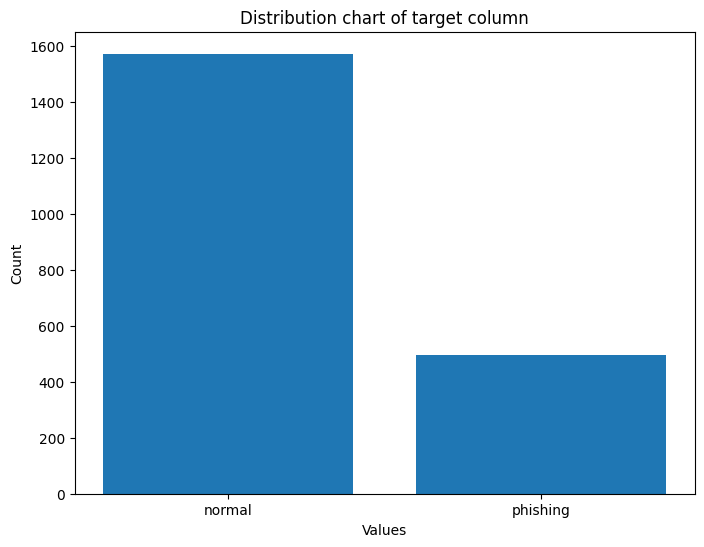

In [ ]:
label_counts = data['label'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(label_counts.index, label_counts.values)
plt.xlabel('Values')
plt.ylabel('Count')
plt.title('Distribution chart of target column')

plt.show()

# ***Pipeline Excercise 1***

In [ ]:
data.replace(0, np.nan, inplace=True)

X = data.drop('label', axis=1)
y = data['label']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Xác định danh sách các feature numeric và categorical
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# Transformer cho numeric features và categorical features
numeric_transformer = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=5)),
    ('scaler', StandardScaler())  # Scaling cho numeric features
])

# Apply one-hot encoding in the categorical transformer
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Specify handle_unknown
])

# Kết hợp các transformer dựa trên danh sách feature
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

In [ ]:
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['page_entropy', 'num_script_tags', 'script_to_body_ratio',
       'html_length', 'page_tokens', 'num_sentences', 'num_punctuations',
       'distinct_tokens', 'capitalizations', 'avg_tokens_per_sentence',
       ...
       'safe_anchor', 'on...
       'domain_registration_length', 'dns_record', 'page_rank'],
      dtype='object', length=118)),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['url', 'host',
                                                   'registration_date',
                                                   'expiration_date',
                                                   'last_updates_dates',
                                                   'registrar', 'reg_country',
                                                   'host_country', 'open_ports',
                                                   'isp', 'tld',
                                                   'scheme'])]))])

# *Thêm vào pipeline việc xử lý mất cân bằng dữ liệu sử dụng các hàm đã học bao gồm SMOTE, SMOTEENN*

In [ ]:
pipeline_smote = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),  # Sử dụng SMOTE
])

pipeline_smoteenn = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('smoteenn', SMOTEENN(random_state=42)),  # Sử dụng SMOTEENN
])

In [ ]:
pipeline_smote

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['page_entropy', 'num_script_tags', 'script_to_body_ratio',
       'html_length', 'page_tokens', 'num_sentences', 'num_punctuations',
       'distinct_tokens', 'capitalizations', 'avg_tokens_per_sentence',
       ...
       'safe_anchor', 'on...
       'domain_registration_length', 'dns_record', 'page_rank'],
      dtype='object', length=118)),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['url', 'host',
                                                   'registration_date',
                                                   'expiration_date',
                                                   'last_updates_dates',
                                                   'registrar', 'reg_country',
                                                   'host_country', 'open_ports',
                                                   'isp', 'tld', 'scheme'])])),
                ('smote', SMOTE(random_state=42))])

In [ ]:
pipeline_smoteenn

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['page_entropy', 'num_script_tags', 'script_to_body_ratio',
       'html_length', 'page_tokens', 'num_sentences', 'num_punctuations',
       'distinct_tokens', 'capitalizations', 'avg_tokens_per_sentence',
       ...
       'safe_anchor', 'on...
       'domain_registration_length', 'dns_record', 'page_rank'],
      dtype='object', length=118)),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['url', 'host',
                                                   'registration_date',
                                                   'expiration_date',
                                                   'last_updates_dates',
                                                   'registrar', 'reg_country',
                                                   'host_country', 'open_ports',
                                                   'isp', 'tld', 'scheme'])])),
                ('smoteenn', SMOTEENN(random_state=42))])

# *So sánh hiệu xuất mô hình (accuracy, recall, f1) giữa không có xử lý imbalance, xử lý imbalance bằng SMOTE, xử lý imbalance bằng SMOTEENN. In ra thành dạng bảng kết quả so sánh này*

In [ ]:
def train_evaluate_random_forest(X_train, y_train, X_test, y_test, t):
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy}')
    print(f'Evaluate Detail of {t}')
    print(classification_report(y_test, y_pred))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

## ***Hiệu xuất mô hình khi Không xử lý imbalance***

In [ ]:
# Combine transformed numeric and categorical features
X_train_transformed = pipeline.fit_transform(X_train)
X_test_transformed = pipeline.transform(X_test)

# Train and evaluate the RandomForestClassifier
train_evaluate_random_forest(X_train_transformed, y_train, X_test_transformed, y_test, t='No Imbalance')

Accuracy: 1.0
Evaluate Detail: No Imbalance
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       309
           1       1.00      1.00      1.00       105

    accuracy                           1.00       414
   macro avg       1.00      1.00      1.00       414
weighted avg       1.00      1.00      1.00       414



## ***Hiệu xuất mô hình khi Xử lý imbalance bằng SMOTE***

In [ ]:
# Fit the SMOTE transformation on the training data
X_train_preprocessed_smote = pipeline_smote.named_steps['preprocessor'].transform(X_train)
X_train_smote, y_train_smote = pipeline_smote.named_steps['smote'].fit_resample(X_train_preprocessed_smote, y_train)

# Transform the test data using the same preprocessor
#X_test_transformed = pipeline.transform(X_test)

# Train and evaluate the RandomForestClassifier
train_evaluate_random_forest(X_train_smote, y_train_smote, X_test_transformed, y_test, t='Imbalance by SMOTE')

Accuracy: 1.0
Evaluate Detail: Imbalance by SMOTE
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       309
           1       1.00      1.00      1.00       105

    accuracy                           1.00       414
   macro avg       1.00      1.00      1.00       414
weighted avg       1.00      1.00      1.00       414



## ***Hiệu xuất mô hình khi Xử lý imbalance bằng SMOTEENN***

In [ ]:
# Fit the SMOTEENN transformation on the training data
X_train_preprocessed_smoteenn = pipeline_smoteenn.named_steps['preprocessor'].transform(X_train)
X_train_smoteenn, y_train_smoteenn = pipeline_smoteenn.named_steps['smoteenn'].fit_resample(X_train_preprocessed_smoteenn, y_train)

# Transform the test data using the same preprocessor
#X_test_transformed = pipeline.transform(X_test)

# Train and evaluate the RandomForestClassifier
train_evaluate_random_forest(X_train_smoteenn, y_train_smoteenn, X_test_transformed, y_test, t='Imbalance by SMOTEENN')

Accuracy: 1.0
Evaluate Detail: Imbalance by SMOTEENN
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       309
           1       1.00      1.00      1.00       105

    accuracy                           1.00       414
   macro avg       1.00      1.00      1.00       414
weighted avg       1.00      1.00      1.00       414

